In [1]:
import random
import numpy as np

In [2]:
#JUGADOR 1

X = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


J1 = [1] * len(X)

for i in range(2, len(X)):
    if X[i-1] == 0 and X[i-2] == 0:
        J1[i] = 0
    else:
        J1[i]=1

print(J1)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [3]:
P = [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [4]:
# Friendman
F = [1]  # F inicia con 1

# Recorrer el vector P desde la posición 1
for i in range(1, len(P)):
    if P[i-1] == 0 or F[-1] == 0:
        F.append(0)
    else:
        F.append(1)

print(F)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# Joss
J = [1]  # J inicia cooperando
turno = 1  # Contador de turnos hasta 10

for i in range(1, len(P)):
    if turno == 10:
        J.append(random.choice([0, 1]))
        turno = 1  # reinicia el contador
    else:
        J.append(P[i-1])  # copia la respuesta anterior de P
        turno += 1

print(J)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]


In [6]:
# Graaskamp
G = [1]  # Graaskamp inicia cooperando
posicion = 2  # empezamos desde la segunda posición (ya que la primera está definida)

for i in range(1, len(P)):
    if posicion % 5 == 0:
        G.append(0)  # cada 5 turnos no coopera
    else:
        G.append(P[i-1])  # copia la respuesta anterior de P
    posicion += 1

print(G)


[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]


In [7]:
# Tit for Tat
n= len(X)
T = np.ones(n, dtype=int)
for i in range(1, n):
    T[i]=X[i-1]
T

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [9]:
import numpy as np
import random

# Acciones de P (jugador 2)
P = [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

# Estrategias de jugadores
# Friedman
F = [1]
for i in range(1, len(P)):
    if P[i-1] == 0 or F[-1] == 0:
        F.append(0)
    else:
        F.append(1)

# Joss
J = [1]
turno = 1
for i in range(1, len(P)):
    if turno == 10:
        J.append(random.choice([0, 1]))
        turno = 1
    else:
        J.append(P[i-1])
        turno += 1

# Graaskamp
G = [1]
posicion = 2
for i in range(1, len(P)):
    if posicion % 5 == 0:
        G.append(0)
    else:
        G.append(P[i-1])
    posicion += 1

# Tit-for-Tat
T = [1]
for i in range(1, len(P)):
    T.append(P[i-1])

# Función para calcular pago
def calcular_pago(a, b):
    if a == 0 and b == 0:
        return 1, 1
    elif a == 1 and b == 1:
        return 3, 3
    elif a == 1 and b == 0:
        return 0, 5
    elif a == 0 and b == 1:
        return 5, 0

# Diccionario de jugadores
jugadores = {
    "Friedman": F,
    "Joss": J,
    "Graaskamp": G,
    "Tit_for_Tat": T
}

# Calcular pagos
pagos_resultado = {}

for nombre, acciones in jugadores.items():
    pagos_jugador = []
    pagos_P = []
    for accion_j, accion_P in zip(acciones, P):
        pago_j, pago_p = calcular_pago(accion_j, accion_P)
        pagos_jugador.append(pago_j)
        pagos_P.append(pago_p)
    pagos_resultado[f"{nombre}_jugador"] = pagos_jugador
    pagos_resultado[f"P_vs_{nombre}"] = pagos_P

# Mostrar resultados
for k, v in pagos_resultado.items():
    print(f"{k}: {v}\n")


Friedman_jugador: [0, 5, 5, 1, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 1, 1, 5, 5, 1]

P_vs_Friedman: [5, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]

Joss_jugador: [0, 5, 3, 0, 1, 1, 5, 0, 5, 3, 5, 0, 5, 0, 5, 0, 1, 5, 3, 0]

P_vs_Joss: [5, 0, 3, 5, 1, 1, 0, 5, 0, 3, 0, 5, 0, 5, 0, 5, 1, 0, 3, 5]

Graaskamp_jugador: [0, 5, 3, 0, 1, 1, 5, 0, 5, 5, 3, 0, 5, 0, 5, 0, 1, 5, 3, 1]

P_vs_Graaskamp: [5, 0, 3, 5, 1, 1, 0, 5, 0, 0, 3, 5, 0, 5, 0, 5, 1, 0, 3, 1]

Tit_for_Tat_jugador: [0, 5, 3, 0, 1, 1, 5, 0, 5, 3, 3, 0, 5, 0, 5, 0, 1, 5, 3, 0]

P_vs_Tit_for_Tat: [5, 0, 3, 5, 1, 1, 0, 5, 0, 3, 3, 5, 0, 5, 0, 5, 1, 0, 3, 5]



In [10]:
import numpy as np
import random

# Acciones de P (jugador 2) aleatorias para 200 turnos
P = [random.choice([0, 1]) for _ in range(200)]

# Estrategias de jugadores
# Friedman
F = [1]
for i in range(1, len(P)):
    if P[i-1] == 0 or F[-1] == 0:
        F.append(0)
    else:
        F.append(1)

# Joss
J = [1]
turno = 1
for i in range(1, len(P)):
    if turno == 10:
        J.append(random.choice([0, 1]))
        turno = 1
    else:
        J.append(P[i-1])
        turno += 1

# Graaskamp
G = [1]
posicion = 2
for i in range(1, len(P)):
    if posicion % 5 == 0:
        G.append(0)
    else:
        G.append(P[i-1])
    posicion += 1

# Tit-for-Tat
T = [1]
for i in range(1, len(P)):
    T.append(P[i-1])

# Función para calcular pago
def calcular_pago(a, b):
    if a == 0 and b == 0:
        return 1, 1
    elif a == 1 and b == 1:
        return 3, 3
    elif a == 1 and b == 0:
        return 0, 5
    elif a == 0 and b == 1:
        return 5, 0

# Diccionario de jugadores
jugadores = {
    "Friedman": F,
    "Joss": J,
    "Graaskamp": G,
    "Tit_for_Tat": T
}

# Calcular pagos
pagos_resultado = {}
totales = {}  # Para sumar pagos de cada jugador y de P

for nombre, acciones in jugadores.items():
    pagos_jugador = []
    pagos_P = []
    for accion_j, accion_P in zip(acciones, P):
        pago_j, pago_p = calcular_pago(accion_j, accion_P)
        pagos_jugador.append(pago_j)
        pagos_P.append(pago_p)
    pagos_resultado[f"{nombre}_jugador"] = pagos_jugador
    pagos_resultado[f"P_vs_{nombre}"] = pagos_P
    # Sumar pagos totales
    totales[f"{nombre}_jugador"] = sum(pagos_jugador)
    totales[f"P_vs_{nombre}"] = sum(pagos_P)

# Imprimir vectores de acciones
print("Vectores de acciones:")
print(f"P: {P}\n")
print(f"F: {F}\n")
print(f"J: {J}\n")
print(f"G: {G}\n")
print(f"T: {T}\n")

# Imprimir vectores de pagos
print("Vectores de pagos:")
for k, v in pagos_resultado.items():
    print(f"{k}: {v}\n")

# Imprimir totales de pagos
print("Pagos totales después de 200 turnos:")
for k, v in totales.items():
    print(f"{k}: {v}")


Vectores de acciones:
P: [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]

F: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
import random
import matplotlib.pyplot as plt

# Parámetros
n = 200  # turnos por partida
num_corridas = 9

# Función de pago
def calcular_pago(a, b):
    if a == 0 and b == 0:
        return 1, 1
    elif a == 1 and b == 1:
        return 3, 3
    elif a == 1 and b == 0:
        return 0, 5
    elif a == 0 and b == 1:
        return 5, 0

# Estrategias como funciones
def friedman_strategy(opponent_moves, my_moves):
    if len(my_moves) == 0:
        return 1
    if opponent_moves[-1] == 0 or my_moves[-1] == 0:
        return 0
    return 1

def joss_strategy(opponent_moves, my_moves):
    if len(my_moves) == 0:
        return 1
    turno = len(my_moves)
    if turno % 10 == 0:
        return random.choice([0, 1])
    return opponent_moves[-1]

def graaskamp_strategy(opponent_moves, my_moves):
    if len(my_moves) == 0:
        return 1
    posicion = len(my_moves) + 1
    if posicion % 5 == 0:
        return 0
    return opponent_moves[-1]

def tit_for_tat_strategy(opponent_moves, my_moves):
    if len(my_moves) == 0:
        return 1
    return opponent_moves[-1]

def tit_for_2tat_strategy(opponent_moves, my_moves):
    if len(my_moves) < 2:
        return 1
    if opponent_moves[-1] == 0 and opponent_moves[-2] == 0:
        return 0
    return 1

def iteso_malvado_strategy(opponent_moves, my_moves):
    chunk_size = 5
    i = len(my_moves)
    if i < chunk_size:
        return 1
    bloque_anterior = (i - 1) // chunk_size
    if bloque_anterior * chunk_size < len(opponent_moves):
        return opponent_moves[bloque_anterior * chunk_size - 1]
    else:
        return 1

def bueno_strategy(opponent_moves, my_moves):
    return 1

def malo_strategy(opponent_moves, my_moves):
    return 0

# Diccionario de estrategias
estrategias = {
    "Friedman": friedman_strategy,
    "Joss": joss_strategy,
    "Graaskamp": graaskamp_strategy,
    "Tit_for_Tat": tit_for_tat_strategy,
    "Tit_for_2Tat": tit_for_2tat_strategy,
    "Iteso_Malvado": iteso_malvado_strategy,
    "Bueno": bueno_strategy,
    "Malo": malo_strategy
}

jugadores = list(estrategias.keys())

# Función para simular una partida entre dos jugadores
def jugar_partida(nombre_a, nombre_b):
    estrategia_a = estrategias[nombre_a]
    estrategia_b = estrategias[nombre_b]
    moves_a, moves_b = [], []
    total_a, total_b = 0, 0

    for _ in range(n):
        move_a = estrategia_a(moves_b, moves_a)
        move_b = estrategia_b(moves_a, moves_b)
        pago_a, pago_b = calcular_pago(move_a, move_b)
        total_a += pago_a
        total_b += pago_b
        moves_a.append(move_a)
        moves_b.append(move_b)

    return total_a, total_b

# Simulación de 9 corridas
resultados_globales = {nombre: 0 for nombre in jugadores}

for corrida in range(num_corridas):
    print(f"\n------ CORRIDA {corrida+1} ------")
    for i, jugador_a in enumerate(jugadores):
        for j, jugador_b in enumerate(jugadores):
            if i >= j:
                continue
            total_a, total_b = jugar_partida(jugador_a, jugador_b)
            resultados_globales[jugador_a] += total_a
            resultados_globales[jugador_b] += total_b
            print(f"{jugador_a} vs {jugador_b}: {total_a} - {total_b}")

# Resultados finales
promedios = {jugador: resultados_globales[jugador] / num_corridas for jugador in jugadores}

print("\n======== PROMEDIOS FINALES DESPUÉS DE 9 CORRIDAS ========")
for jugador, promedio in promedios.items():
    print(f"{jugador}: {promedio:.2f}")


------ CORRIDA 1 ------
Friedman vs Joss: 251 - 216
Friedman vs Graaskamp: 211 - 211
Friedman vs Tit_for_Tat: 600 - 600
Friedman vs Tit_for_2Tat: 600 - 600
Friedman vs Iteso_Malvado: 600 - 600
Friedman vs Bueno: 600 - 600
Friedman vs Malo: 199 - 204
Joss vs Graaskamp: 301 - 346
Joss vs Tit_for_Tat: 540 - 540
Joss vs Tit_for_2Tat: 608 - 588
Joss vs Iteso_Malvado: 618 - 573
Joss vs Bueno: 618 - 573
Joss vs Malo: 187 - 252
Graaskamp vs Tit_for_Tat: 218 - 213
Graaskamp vs Tit_for_2Tat: 680 - 480
Graaskamp vs Iteso_Malvado: 211 - 211
Graaskamp vs Bueno: 680 - 480
Graaskamp vs Malo: 199 - 204
Tit_for_Tat vs Tit_for_2Tat: 600 - 600
Tit_for_Tat vs Iteso_Malvado: 600 - 600
Tit_for_Tat vs Bueno: 600 - 600
Tit_for_Tat vs Malo: 199 - 204
Tit_for_2Tat vs Iteso_Malvado: 600 - 600
Tit_for_2Tat vs Bueno: 600 - 600
Tit_for_2Tat vs Malo: 198 - 208
Iteso_Malvado vs Bueno: 600 - 600
Iteso_Malvado vs Malo: 195 - 220
Bueno vs Malo: 0 - 1000

------ CORRIDA 2 ------
Friedman vs Joss: 307 - 277
Friedman vs G

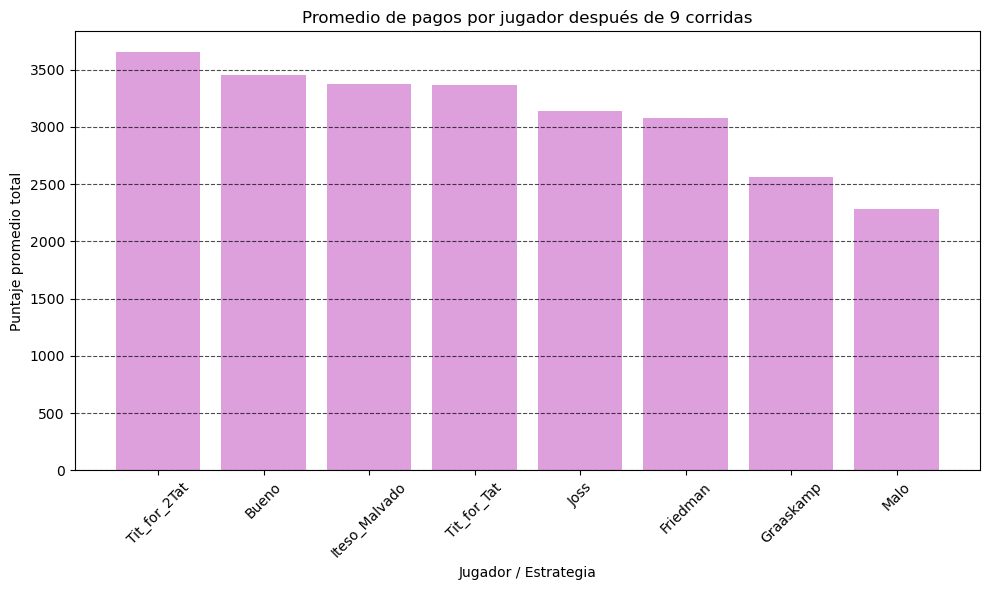

In [11]:
# GRÁFICO DE RESULTADOS 
# Ordenar los promedios por valor descendente
promedios_ordenados = dict(sorted(promedios.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,6))
plt.bar(promedios_ordenados.keys(), promedios_ordenados.values(), color='plum')
plt.title("Promedio de pagos por jugador después de 9 corridas")
plt.ylabel("Puntaje promedio total")
plt.xlabel("Jugador / Estrategia")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7, color='black')
plt.tight_layout()
plt.show()
